In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('./haberman.csv',names=['Age','Op_Year','axil_nodes_det','Surv_status'])

In [3]:
df.head()

,Age,Op_Year,axil_nodes_det,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#We have data of patient who has undergone surgery for breast cancer .
#After surgery did the patient survived for 5 years or not??
#with given given data we have to explore that which feature has impact on survival of patient and how much.

#### Basic Data Intuition 

In [4]:
df.shape
# Shows 306 data point and 4 feature

(306, 4)

In [5]:
df.info()

# No Null data enteries in any data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age               306 non-null int64
Op_Year           306 non-null int64
axil_nodes_det    306 non-null int64
Surv_status       306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [6]:
df.columns



Index(['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status'], dtype='object')

In [11]:
df.Surv_status.value_counts()


1    225
2     81
Name: Surv_status, dtype: int64

In [7]:
df.Surv_status.value_counts()/df.shape[0]

# No of "Not Survived" is almost 1/4 of total data points.

1    0.735294
2    0.264706
Name: Surv_status, dtype: float64

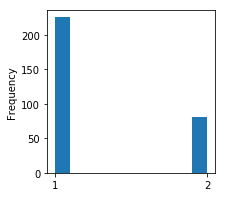

In [14]:
plt.figure()
plt.subplot()
df.Surv_status.plot(kind='hist',xticks=[1,2],figsize=(3,3),)
plt.show()

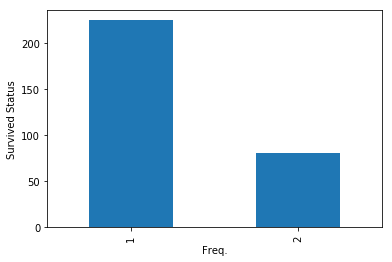

In [22]:
df.Surv_status.value_counts().sort_index().plot('bar')
plt.xlabel("Freq.")
plt.ylabel("Survived Status")
plt.show()

#### Bar and Hist plot to see the proportion of data points available to each class

### Univaraite analysis(PDF, CDF, Dist-plot) 

In [12]:
df_Survived=df.loc[df.Surv_status==1]
df_Notsurvived=df.loc[df.Surv_status==2]

In [10]:
def plot_pdf_cdf(pdf,cdf,bins_points,title):
    plt.plot(bins_points[1:],pdf,label=title)
    plt.plot(bins_points[1:],cdf)
    plt.legend()
    
#    plt.grid()
#    plt.show()

# bins_point[1:] is used because there are toatal 11 points which is 1 more than pdf size 

[ 0.03703704  0.12345679  0.19753086  0.19753086  0.13580247  0.12345679
  0.09876543  0.04938272  0.02469136  0.01234568]
[ 34.   38.9  43.8  48.7  53.6  58.5  63.4  68.3  73.2  78.1  83. ]
[ 0.05333333  0.10666667  0.12444444  0.09333333  0.16444444  0.16444444
  0.09333333  0.11111111  0.06222222  0.02666667]
[ 30.   34.7  39.4  44.1  48.8  53.5  58.2  62.9  67.6  72.3  77. ]


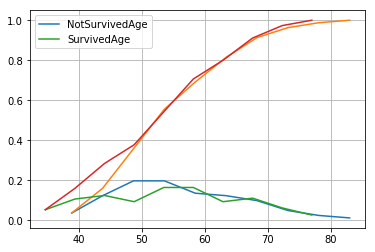

In [11]:
plt.figure(3)

age,bins_points_age=np.histogram(a=df_Notsurvived.Age,bins=10)
pdf_age=age/sum(age)
print(pdf_age)
print(bins_points_age)
cdf_age=np.cumsum(pdf_age)
plot_pdf_cdf(pdf_age,cdf_age,bins_points_age,"NotSurvivedAge")


age,bins_points_age=np.histogram(a=df_Survived.Age,bins=10)
pdf_age=age/sum(age)
print(pdf_age)
print(bins_points_age)
cdf_age=np.cumsum(pdf_age)
plot_pdf_cdf(pdf_age,cdf_age,bins_points_age,"SurvivedAge")
plt.legend()
plt.grid()
plt.show();

#### Multiple crossover doesnt give clear insight about age effect but cahnces of "not surving" has more chances compare to "survivin"

[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]
[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


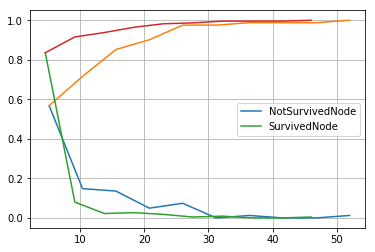

In [12]:
plt.figure(2)
plt.subplot()
node,bins_points_node=np.histogram(df_Notsurvived.axil_nodes_det,bins=10)
pdf_node=node/sum(node)
print(pdf_node)
print(bins_points_node)
cdf_node=np.cumsum(pdf_node)
plot_pdf_cdf(pdf_node,cdf_node,bins_points_node,"NotSurvivedNode")


node,bins_points_node=np.histogram(df_Survived.axil_nodes_det,bins=10)
pdf_node=node/sum(node)
print(pdf_node)
print(bins_points_node)
cdf_node=np.cumsum(pdf_node)
plot_pdf_cdf(pdf_node,cdf_node,bins_points_node,"SurvivedNode")
plt.legend()
plt.grid()
plt.show();

#### If the "No. of nodes detected" is < 10 then chances of "Surviving" is more than "Not surviving"

[ 0.25925926  0.04938272  0.03703704  0.08641975  0.09876543  0.09876543
  0.16049383  0.07407407  0.04938272  0.08641975]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]
[ 0.18666667  0.10666667  0.10222222  0.07111111  0.09777778  0.10222222
  0.06666667  0.09777778  0.09333333  0.07555556]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]


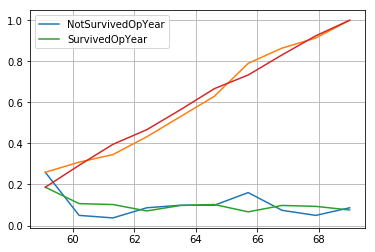

In [13]:
plt.figure(1)

yr,bins_points_yr=np.histogram(a=df_Notsurvived.Op_Year,bins=10)
pdf_yr=yr/sum(yr)
print(pdf_yr)
print(bins_points_yr)
cdf_yr=np.cumsum(pdf_yr)
plot_pdf_cdf(pdf_yr,cdf_yr,bins_points_yr,"NotSurvivedOpYear")



yr,bins_points_yr=np.histogram(a=df_Survived.Op_Year,bins=10)
pdf_yr=yr/sum(yr)
print(pdf_yr)
print(bins_points_yr)
cdf_yr=np.cumsum(pdf_yr)
plot_pdf_cdf(pdf_yr,cdf_yr,bins_points_yr,"SurvivedOpYear")
plt.legend()
plt.grid()
plt.show();

#### cdf indicates that except some year (65 to 67 and <61) the chance of "surviving" is more

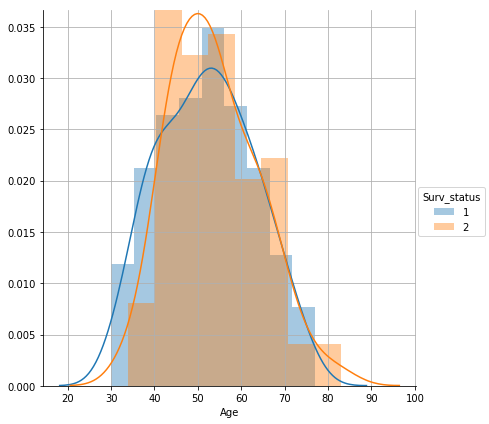

In [23]:
sns.FacetGrid(data=df,hue='Surv_status',size=6).map(sns.distplot,"Age").add_legend();
plt.grid()
plt.show();

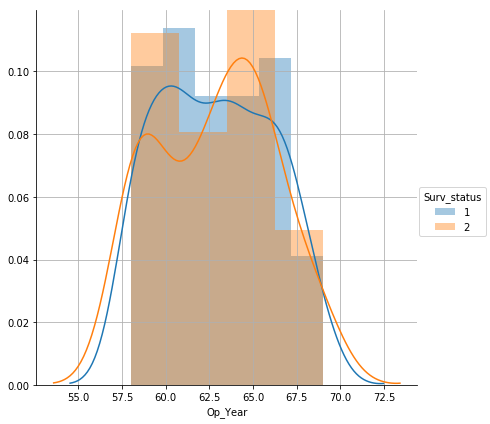

In [33]:
sns.FacetGrid(data=df,hue="Surv_status",size=6).map(sns.distplot,"Op_Year").add_legend();
plt.grid()
plt.show()

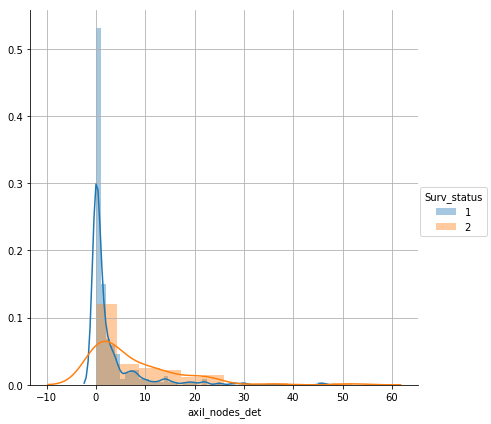

In [30]:
sns.FacetGrid(data=df,hue="Surv_status",size=6).map(sns.distplot,"axil_nodes_det").add_legend();
plt.grid()
plt.show()

#### Except the distplot of "axil nodes detected" the other distplots are jumbled and doesnot give clear picture where as "axil_nodes_det"<10 gives more surviving hope.

### Box Plot and Voilin plot

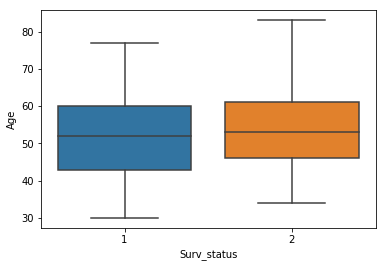

In [26]:
sns.boxplot(data=df,x='Surv_status',y='Age')
plt.show()


#### Both looks same but early Age guys have more survival chances while whisker of "not survived" shows late age might lead to fail operation.

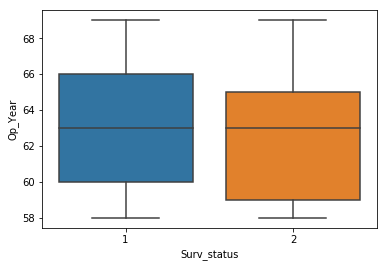

In [28]:
sns.boxplot(data=df,x='Surv_status',y='Op_Year')
plt.show()

#### Here early opertaions (Intial years of operations) were more failure while later year has more sucess chances

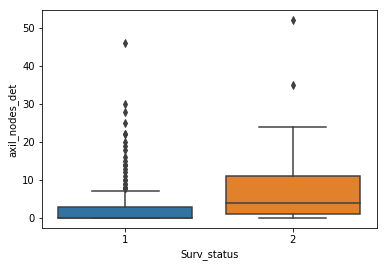

In [29]:
sns.boxplot(data=df,x='Surv_status',y='axil_nodes_det')
plt.show()

#### The median of both box's are low this might be outlier issue but more axil nodes detected has more not surving chances. 

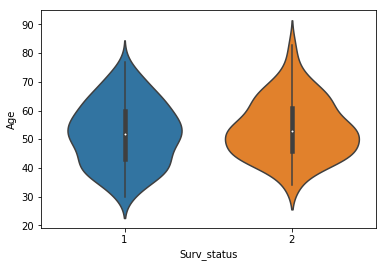

In [33]:
sns.violinplot(data=df,x="Surv_status",y='Age',size=6)

plt.show()

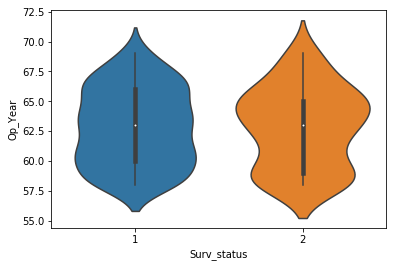

In [34]:
sns.violinplot(data=df,x="Surv_status",y='Op_Year',size=6)
plt.show()

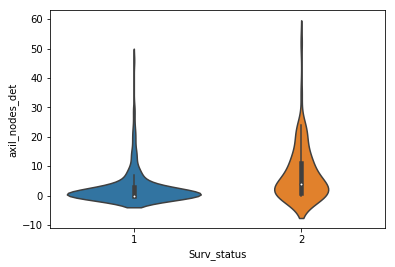

In [35]:
sns.violinplot(data=df,x="Surv_status",y='axil_nodes_det',size=6)
plt.show()

#### Data seems nicely distributed for "Age" and "Op_Year" but "axil_nodes_det" has outliers which is impacting the the pattern

## Bi Variate Analysis (Pair Plot)

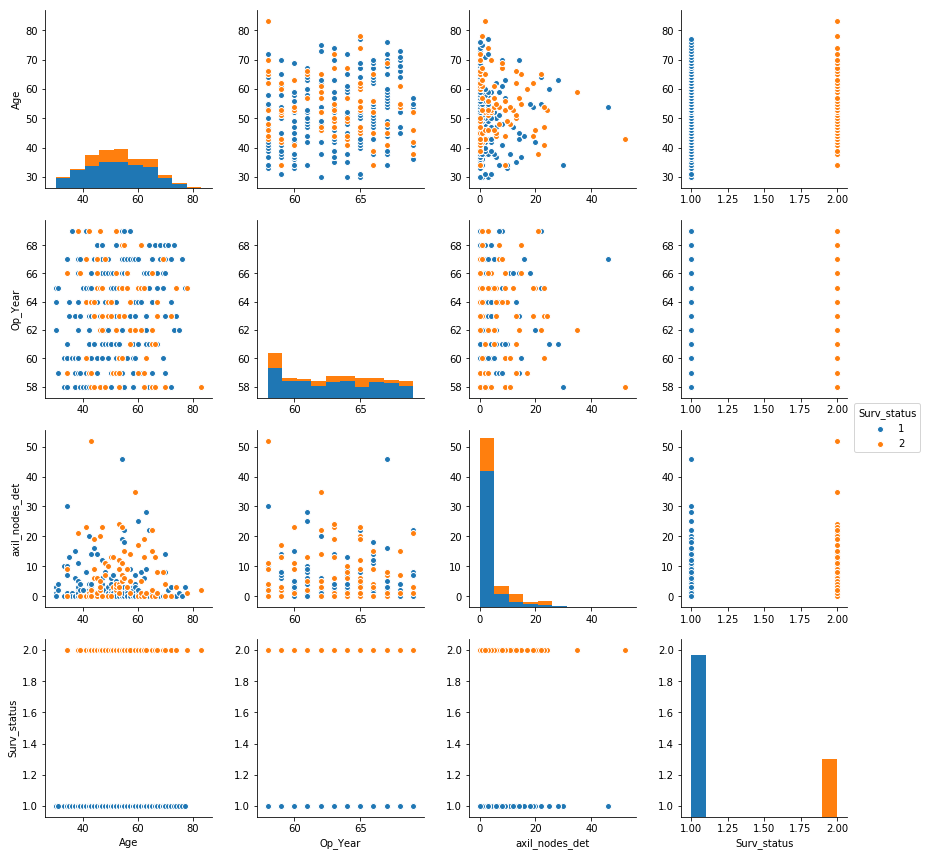

In [40]:
sns.pairplot(data=df,hue="Surv_status",size=3)
plt.show()

#### No combination of two feature is giving clear idea of classification as no class seems  linearly separable

### Multi Variate Analysis (Joint Plot)

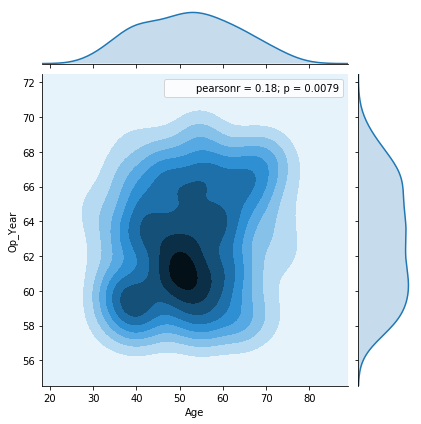

In [46]:
sns.jointplot(data=df_Survived,y="Op_Year",x="Age",kind='kde')
plt.show()

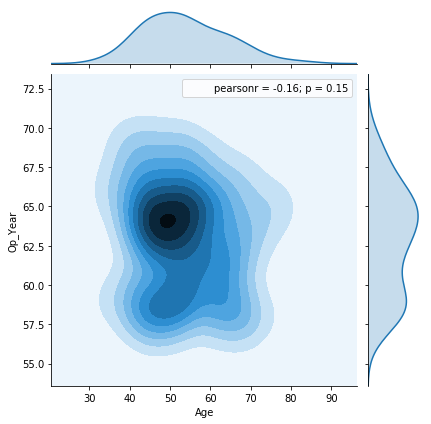

In [47]:
sns.jointplot(data=df_Notsurvived,y="Op_Year",x="Age",kind='kde')
plt.show()